# 导入

In [32]:
import networkx as nx
import matplotlib.pyplot as plt
import jieba.posseg as pseg
#引入词性标注接口
#导入random包
import random
import codecs
# 导入pyecharts
from pyecharts import options as opts
# pyecharts 柱状图
from pyecharts.charts import Bar
# pyecharts 词云图
from pyecharts.charts import WordCloud
# pyecharts 折线/面积图
from pyecharts.charts import Line
# 词云
import wordcloud
import imageio

# -*- coding: utf-8 -*-
# 导入networkx，matplotlib包
import networkx as nx
import matplotlib.pyplot as plt
import jieba.posseg as pseg  # 引入词性标注接口
# 导入random包
import random
import codecs
# 导入pyecharts
from pyecharts import options as opts
# pyecharts 柱状图
from pyecharts.charts import Bar
# pyecharts 词云图
from pyecharts.charts import WordCloud
# pyecharts 折线/面积图
from pyecharts.charts import Line
# 词云
import wordcloud
import imageio

# 定义主要人物的个数(用于人物关系图,人物出场次数可视化图)
mainTop = 15

In [33]:
def read_txt():
    file = open('D:\\s\\三国演义.txt',encoding='utf-8')
    txt = file.read()
    file.close()
    return txt

# 停顿词处理

In [34]:
txt = read_txt()
def stopwordslist(filepath):
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]
    return stopwords
excludes = {'将军', '却说', '令人', '赶来', '徐州', '不见', '下马', '喊声', '因此', '未知', '大败', '百姓', '大事',
            '一军', '之后', '接应', '起兵',
            '成都', '原来', '江东', '正是', '忽然', '原来', '大叫', '上马', '天子', '一面', '太守', '不如', '忽报',
            '后人', '背后', '先主', '此人',
            '城中', '然后', '大军', '何不', '先生', '何故', '夫人', '不如', '先锋', '二人', '不可', '如何', '荆州',
            '不能', '如此', '主公', '军士',
            '商议', '引兵', '次日', '大喜', '魏兵', '军马', '于是', '东吴', '今日', '左右', '天下', '不敢', '陛下',
            '人马', '不知', '都督', '汉中',
            '一人', '众将', '后主', '只见', '蜀兵', '马军', '黄巾', '立功', '白发', '大吉', '红旗', '士卒', '钱粮',
            '于汉', '郎舅', '龙凤', '古之', '白虎',
            '古人云', '尔乃', '马飞报', '轩昂', '史官', '侍臣', '列阵', '玉玺', '车驾', '老夫', '伏兵', '都尉', '侍中',
            '西凉', '安民', '张曰', '文武', '白旗',
            '祖宗', '寻思'}  # 排除的词汇


# # 通过键值对的形式存储词语及其出现的次数

In [35]:
counts = {} # 通过键值对的形式存储词语及其出现的次数
def getWordTimes():
    # 分词，返回词性
    poss = pseg.cut(txt)
    for w in poss:
        if w.flag != 'nr' or len(w.word) < 2 or w.word in excludes:
            continue  # 当分词长度小于2或该词词性不为nr（人名）时认为该词不为人名
        elif w.word == '孔明' or w.word == '孔明曰' or w.word == '卧龙先生':
            real_word = '诸葛亮'
        elif w.word == '云长' or w.word == '关公曰' or w.word == '关公':
            real_word = '关羽'
        elif w.word == '玄德' or w.word == '玄德曰' or w.word == '玄德甚' or w.word == '玄德遂' or w.word == '玄德兵' or w.word == '玄德领' \
                or w.word == '玄德同' or w.word == '刘豫州' or w.word == '刘玄德':
            real_word = '刘备'
        elif w.word == '孟德' or w.word == '丞相' or w.word == '曹贼' or w.word == '阿瞒' or w.word == '曹丞相' or w.word == '曹将军':
            real_word = '曹操'
        elif w.word == '高祖':
            real_word = '刘邦'
        elif w.word == '光武':
            real_word = '刘秀'
        elif w.word == '桓帝':
            real_word = '刘志'
        elif w.word == '灵帝':
            real_word = '刘宏'
        elif w.word == '公瑾':
            real_word = '周瑜'
        elif w.word == '伯符':
            real_word = '孙策'
        elif w.word == '吕奉先' or w.word == '布乃' or w.word == '布大怒' or w.word == '吕布之':
            real_word = '吕布'
        elif w.word == '赵子龙' or w.word == '子龙':
            real_word = '赵云'
        elif w.word == '卓大喜' or w.word == '卓大怒':
            real_word = '董卓'  # 把相同意思的名字归为一个人
        else:
            real_word = w.word
        counts[real_word] = counts.get(real_word, 0) + 1

# 降序排列

In [36]:
getWordTimes()
items = list(counts.items())
# 进行降序排列 根据词语出现的次数进行从大到小排序
items.sort(key=lambda x: x[1], reverse=True)

# 结果

In [37]:
def wordFreq(filepath, topn):
    with codecs.open(filepath, "w", "utf-8") as f:
        for i in range(topn):
            word, count = items[i]
            f.write("{}:{}\n".format(word, count))
wordFreq("三国演义词频_人名.txt", 300)
fr = open('三国演义词频_人名.txt', 'r', encoding='utf-8')
dic = {}
keys = []  # 用来存储读取的顺序
for line in fr:
    # 去空白,并用split()方法返回列表
    v = line.strip().split(':')
    # print("v",v)   # v ['诸葛亮', '1373']
    # 拼接字典 {'诸葛亮', '1373'}
    dic[v[0]] = v[1]
    keys.append(v[0])
fr.close()
# 输出前几个的键值对
print("人物出现次数:", mainTop)
print(list(dic.items())[:mainTop])


人物出现次数: 15
[('诸葛亮', '1363'), ('刘备', '1192'), ('曹操', '969'), ('关羽', '602'), ('张飞', '348'), ('吕布', '331'), ('赵云', '330'), ('孙权', '263'), ('周瑜', '255'), ('司马懿', '221'), ('魏延', '211'), ('袁绍', '189'), ('马超', '183'), ('姜维', '179'), ('黄忠', '168')]


# 绘图操作

In [38]:
list_name = list(dic.keys())  # 人名
list_name_times = list(dic.values())  # 提取字典里的数据作为绘图数据

In [39]:
from pyecharts.charts import Bar
from pyecharts import options as opts
def creat_people_view():
    bar = Bar()
    bar.add_xaxis(list_name[0:mainTop])
    bar.add_yaxis("人物出场次数", list_name_times)
    bar.set_global_opts(title_opts=opts.TitleOpts(title="人物出场次数可视化图", subtitle="三国人物TOP" + str(mainTop)),
                        toolbox_opts=opts.ToolboxOpts(is_show=True),
                        xaxis_opts=opts.AxisOpts(axislabel_opts={"rotate": 45}))
    bar.set_series_opts(label_opts=opts.LabelOpts(position="top"))
    bar.render_notebook()  # 在 notebook 中展示
    bar.render("三国演义人物出场次数可视化图.html")
    
creat_people_view()

# 生成词云

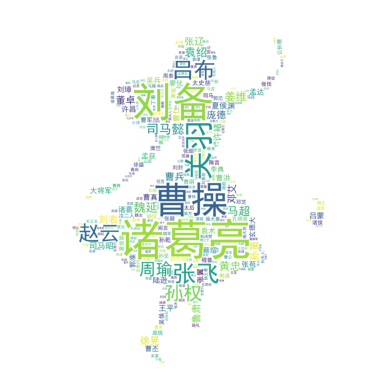

In [40]:
bg_pic = imageio.imread_v2('D:\\s\\alice-mask.png')
# 定义文件路径  
file_path = r"C:\\Users\\33079\\PycharmProjects\\pys\\三国演义词频_人名.txt"  
  
# 创建一个空字典来存储词频  
word_freq_dict = {}  
  
# 尝试打开文件并读取内容  
try:  
    with open(file_path, "r", encoding="utf-8") as file:  
        # 遍历文件的每一行  
        for line in file:  
            # 去除行尾的换行符并以冒号分隔键和值  
            key, value = line.strip().split(':')  
            # 去除值两侧的空格并将其转换为整数  
            value = int(value.strip())  
            # 将键和值添加到字典中  
            word_freq_dict[key] = value  
except FileNotFoundError:  
    print(f"文件 {file_path} 未找到。")  
except Exception as e:  
    print(f"读取文件时出错: {e}")  
  

def creat_wordcloud():
    wc = wordcloud.WordCloud(font_path='D:\\s\\simhei.ttf',
                               background_color='white',
                             width=1000, height=800,
                             # stopwords=excludes,# 设置停用词
                             max_words=500,
                             mask=bg_pic  # mask参数设置词云形状
                             )
    # 从单词和频率创建词云
    wc.generate_from_frequencies(word_freq_dict)
    # generate(text)  根据文本生成词云
    # wc.generate(txt)
    # 保存图片
    wc.to_file('三国演义词云_人名.png')

    #  显示词云图片
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

def creat_wordcloud_pyecharts():
    wordsAndTimes = list(dic.items())
    (
        WordCloud()
        .add(series_name="人物次数", data_pair=wordsAndTimes,
             word_size_range=[20, 100], textstyle_opts=opts.TextStyleOpts(font_family="cursive"), )
        .set_global_opts(title_opts=opts.TitleOpts(title="三国演义词云"))
        .render("三国演义词云_人名.html")
    )

creat_wordcloud()
 

# 生成章回字数

In [41]:
def chapter_word():
    # 进行章回切片
    list2 = txt.split("------------")
    chapter_list = [i for i in range((len(list2)))]
    word_list = [len(i) for i in list2]
    
    (
        Line(init_opts=opts.InitOpts(width="1400px", height="700px"))
        .add_xaxis(xaxis_data=chapter_list)
        .add_yaxis(
            series_name="章回字数",
            y_axis=word_list,
            markpoint_opts=opts.MarkPointOpts(
                data=[
                    opts.MarkPointItem(type_="max", name="最大值"),
                    opts.MarkPointItem(type_="min", name="最小值"),
                ]
            ),
            markline_opts=opts.MarkLineOpts(
                data=[opts.MarkLineItem(type_="average", name="平均值")]
            ),
        )
        .set_global_opts(
            title_opts=opts.TitleOpts(title="三国演义章回字数", subtitle=""),
            tooltip_opts=opts.TooltipOpts(trigger="axis"),
            toolbox_opts=opts.ToolboxOpts(is_show=True),
            xaxis_opts=opts.AxisOpts(type_="category", boundary_gap=False),
        )
        .render("三国演义章回字数.html")
    )
chapter_word()

# 颜色处理

In [42]:
colorNum = len(list_name[0:mainTop])
def randomcolor():
    colorArr = ['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F']
    color = ""
    for i in range(6):
        color += colorArr[random.randint(0, 14)]
    return "#" + color


def color_list():
    colorList = []
    for i in range(colorNum):
        colorList.append(randomcolor())

    return colorList

# 生成人物关系图

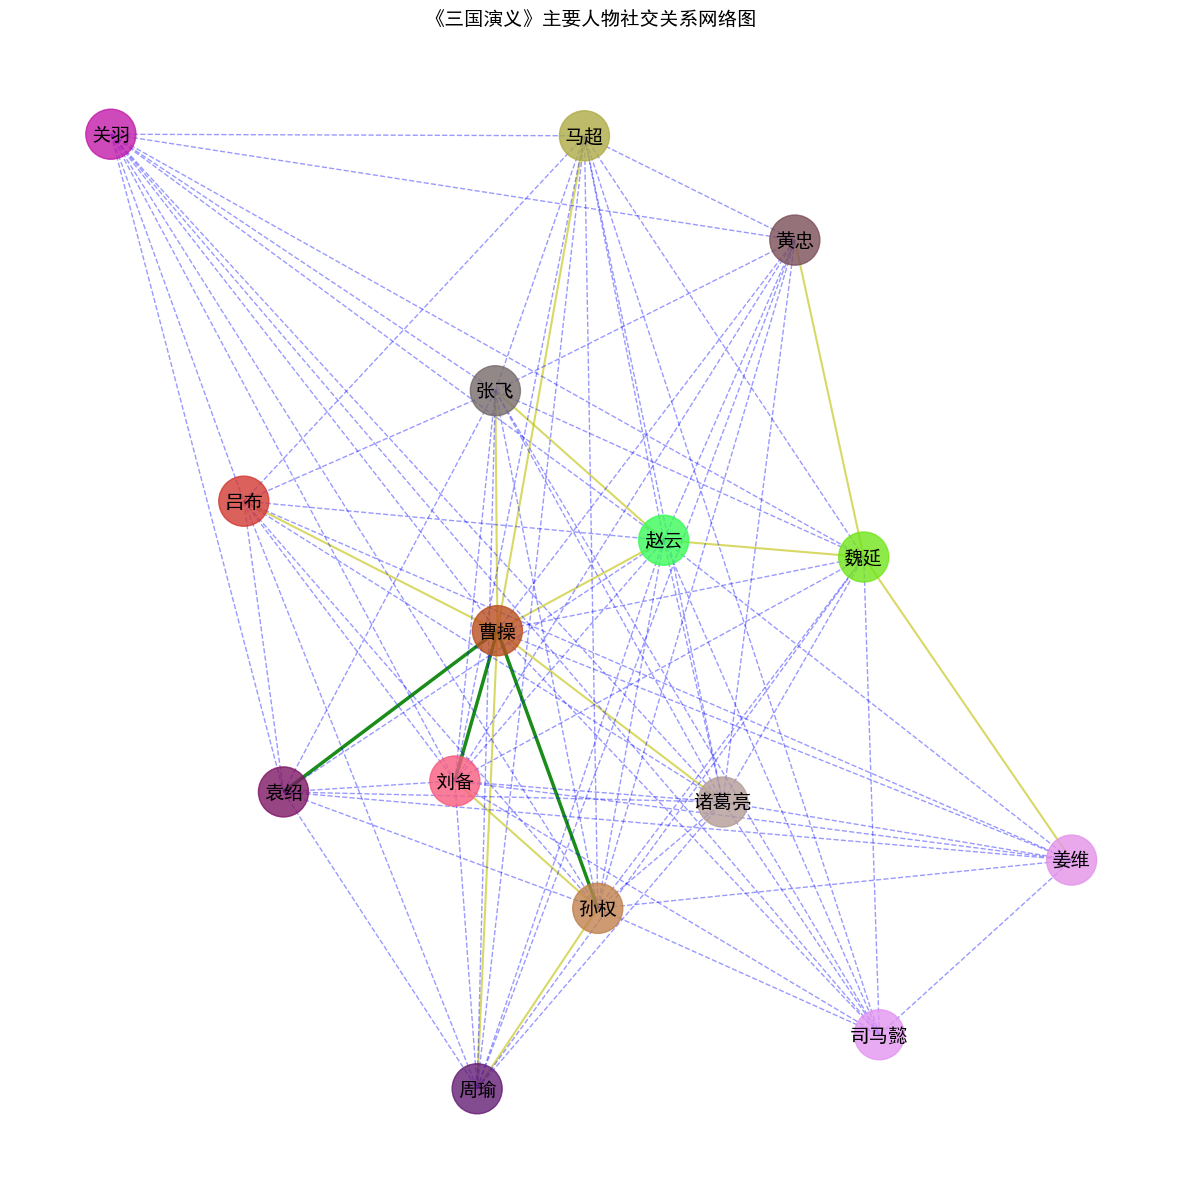

In [43]:
from matplotlib.font_manager import FontProperties
 
def creat_relationship():
    font_path = 'D:\\s\\simhei.ttf'
    font = FontProperties(fname=font_path, size=14)
    plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
    # 人物节点颜色
    colors = color_list()
    Names = list_name[0:mainTop]
    relations = {}
    # 按段落划分，假设在同一段落中出现的人物具有共现关系
    lst_para = (txt).split('\n')  # lst_para是每一段
    for text in lst_para:
        for name_0 in Names:
            if name_0 in text:
                for name_1 in Names:
                    if name_1 in text and name_0 != name_1 and (name_1, name_0) not in relations:
                        relations[(name_0, name_1)] = relations.get((name_0, name_1), 0) + 1
    maxRela = max([v for k, v in relations.items()])
    relations = {k: v / maxRela for k, v in relations.items()}
    plt.figure(figsize=(15, 15))
    # 创建无多重边无向图
    G = nx.Graph()
    for k, v in relations.items():
        G.add_edge(k[0], k[1], weight=v)
    # 筛选权重大于0.6的边
    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.6]
    # 筛选权重大于0.3小于0.6的边
    emidle = [(u, v) for (u, v, d) in G.edges(data=True) if (d['weight'] > 0.3) & (d['weight'] <= 0.6)]
    # 筛选权重小于0.3的边
    esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.3]
    # 设置图形布局
    pos = nx.spring_layout(G)  # 用Fruchterman-Reingold算法排列节点（样子类似多中心放射状）
    # 设置节点样式
    nx.draw_networkx_nodes(G, pos, alpha=0.8, node_size=1300, node_color=colors)
    # 设置大于0.6的边的样式
    nx.draw_networkx_edges(G, pos, edgelist=elarge, width=2.5, alpha=0.9, edge_color='g')
    # 0.3~0.6
    nx.draw_networkx_edges(G, pos, edgelist=emidle, width=1.5, alpha=0.6, edge_color='y')
    # <0.3
    nx.draw_networkx_edges(G, pos, edgelist=esmall, width=1, alpha=0.4, edge_color='b', style='dashed')
    nx.draw_networkx_labels(G, pos, font_size=14)
    font_path = 'D:\\s\\simhei.ttf'
    font = FontProperties(fname=font_path, size=14)
    plt.title("《三国演义》主要人物社交关系网络图", fontproperties=font)
    # 关闭坐标轴
    plt.axis('off')

    # 保存图表
    plt.savefig('《三国演义》主要人物社交关系网络图.png', bbox_inches='tight')
    plt.show()

creat_relationship()